<a href="https://colab.research.google.com/github/mugash70/login/blob/master/newPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [499]:
df= pd.read_csv("https://bit.do/heart-disease", usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], header=None,names=['A','B','C','D','E','F','G','H','I','J','K','L','M','res'])


In [503]:
df.head()
X= df.drop(columns=['res'])
X=df.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
Y=df['res']


In [504]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from collections import namedtuple

In [510]:
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=39, shuffle=True)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [515]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
best_xgc_score=0
model = XGBClassifier(max_depth=20)
model.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='mlogloss', verbose=True)



[0]	validation_0-mlogloss:1.3812	validation_1-mlogloss:1.38227
[1]	validation_0-mlogloss:1.20202	validation_1-mlogloss:1.20358
[2]	validation_0-mlogloss:1.05573	validation_1-mlogloss:1.05752
[3]	validation_0-mlogloss:0.933287	validation_1-mlogloss:0.935168
[4]	validation_0-mlogloss:0.829046	validation_1-mlogloss:0.83095
[5]	validation_0-mlogloss:0.739206	validation_1-mlogloss:0.741097
[6]	validation_0-mlogloss:0.661072	validation_1-mlogloss:0.662926
[7]	validation_0-mlogloss:0.592642	validation_1-mlogloss:0.594445
[8]	validation_0-mlogloss:0.532381	validation_1-mlogloss:0.534126
[9]	validation_0-mlogloss:0.479084	validation_1-mlogloss:0.480766
[10]	validation_0-mlogloss:0.431776	validation_1-mlogloss:0.433396
[11]	validation_0-mlogloss:0.389665	validation_1-mlogloss:0.391221
[12]	validation_0-mlogloss:0.352087	validation_1-mlogloss:0.353582
[13]	validation_0-mlogloss:0.318489	validation_1-mlogloss:0.319922
[14]	validation_0-mlogloss:0.288394	validation_1-mlogloss:0.289769
[15]	validati

XGBClassifier(max_depth=20, objective='multi:softprob')

In [403]:
import tensorflow as tf


In [516]:

model = Sequential()

model.add(Dense(12,input_dim=14,kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 12)                180       
                                                                 
 dropout_117 (Dropout)       (None, 12)                0         
                                                                 
 dense_111 (Dense)           (None, 6)                 78        
                                                                 
 dropout_118 (Dropout)       (None, 6)                 0         
                                                                 
 dense_112 (Dense)           (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [517]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
reducelrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

early_stopping_monitor=EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )

best_trained_model_file= 'best_trained_model.h5'
checkpoint = ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  

callbacks=[checkpoint, reducelrp]
learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)
# history=model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=6, callbacks=callbacks,verbose=0)
history = model.fit(X_train,y_train,batch_size=6,epochs=100,validation_split=0.33,shuffle=False,callbacks=[learning_rate_reduction])

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 0.6918 - accuracy: 0.2113 - val_loss: 0.6891 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.1901 - val_loss: 0.6854 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.1901 - val_loss: 0.6816 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.1901 - val_loss: 0.6774 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.1901 - val_loss: 0.6729 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6775 - accuracy: 0.1901 - val_loss: 0.6680 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.

<function matplotlib.pyplot.show>

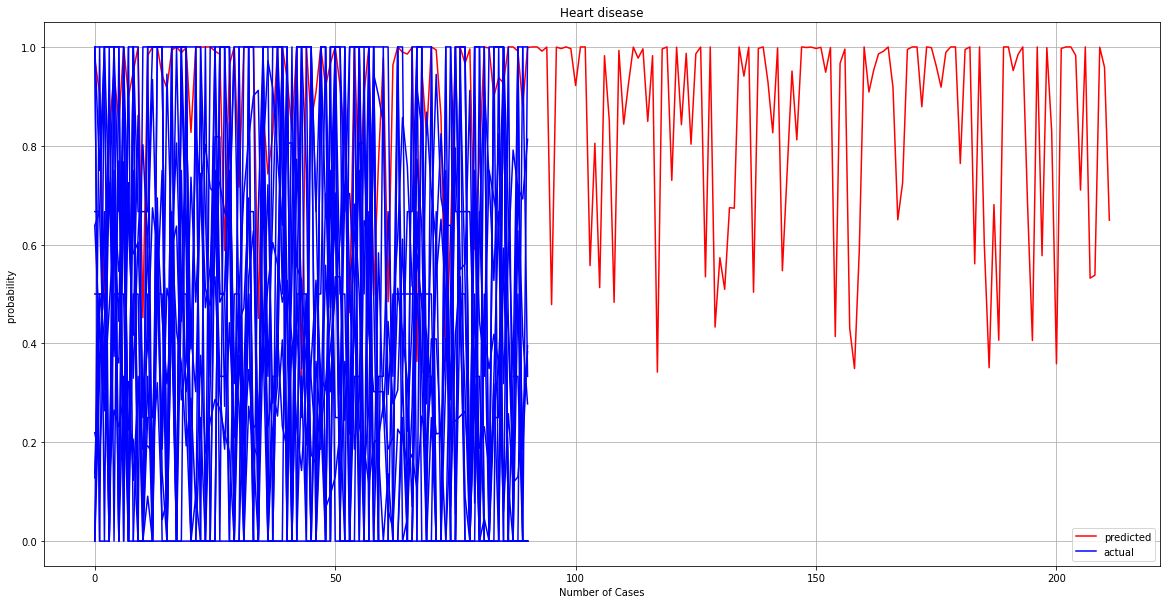

In [538]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_train)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(y_pred, color='red')
plt.plot(X_test, color='blue')

plt.title('Heart disease')
plt.ylabel('probability ')
plt.xlabel('Number of Cases')
plt.legend(['predicted', 'actual'])
plt.grid(True)
plt.show